In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("AAPL_5yr_stock_data.csv")
df

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [3]:
df.info

<bound method DataFrame.info of             date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]>

In [4]:
rows=df.shape[0]
columns=df.shape[1]
print("Number of rows=", rows)
print("Number of columns=", columns)
df.replace("NaN", pd.NA, inplace=True)
print(df.columns.tolist())
missing=df.isnull().sum()
print("")
print("Total missing values in each column in the given dataset")
print(missing)

Number of rows= 1259
Number of columns= 7
['date', 'open', 'high', 'low', 'close', 'volume', 'Name']

Total missing values in each column in the given dataset
date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64


In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.drop_duplicates()
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
 6   name    1259 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 69.0+ KB
None


                                date         open         high          low  \
count                           1259  1259.000000  1259.000000  1259.000000   
mean   2015-08-09 05:44:16.393963264   109.055429   109.951118   108.141589   
min              2013-02-08 00:00:00    55.424200    57.085700    55.014200   
25%              2014-05-10 12:00:00    84.647800    85.334950    84.250650   
50%              2015-08-10 00:00:00   108.970000   110.030000   108.050000   
75%              2016-11-05 12:00:00   127.335000   128.100000   126.290000   
max              2018-02-07 00:00:00   179.370000   180.100000   178.250000   
std                              NaN    30.549220    30.686186    30.376224   

             close        volume  
count  1259.000000  1.259000e+03  
mean    109.066698  5.404790e+07  
min      55.789900  1.147592e+07  
25%      84.830650  2.969438e+07  
50%     109.010000  4.566893e+07  
75%     127.120000  6.870872e+07  
max     179.260000  2.668336e+08  
std     

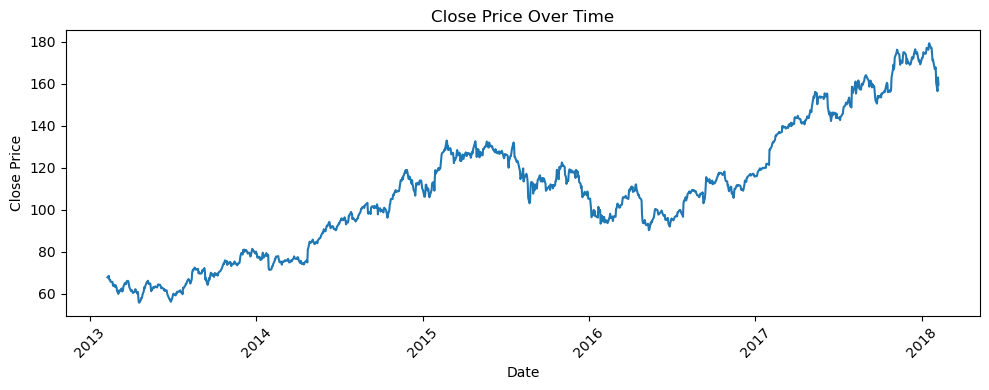

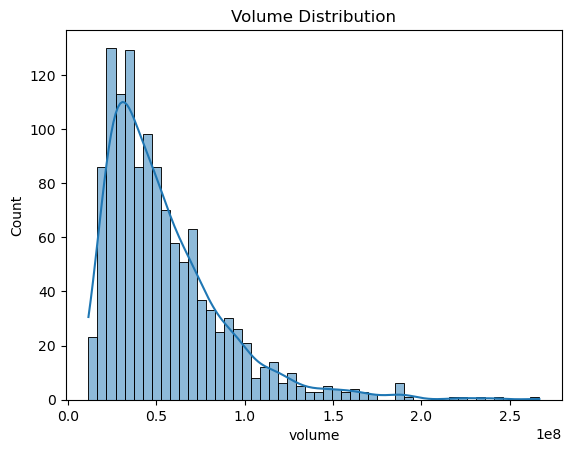

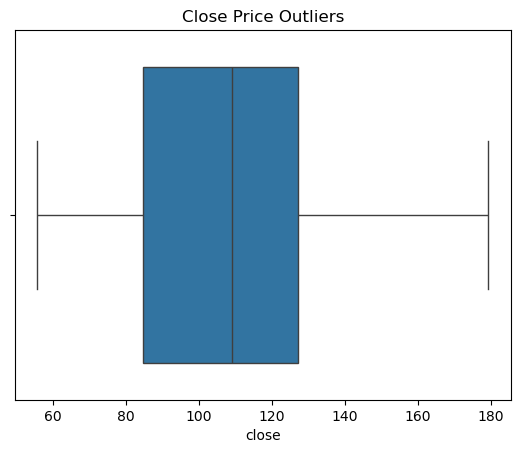

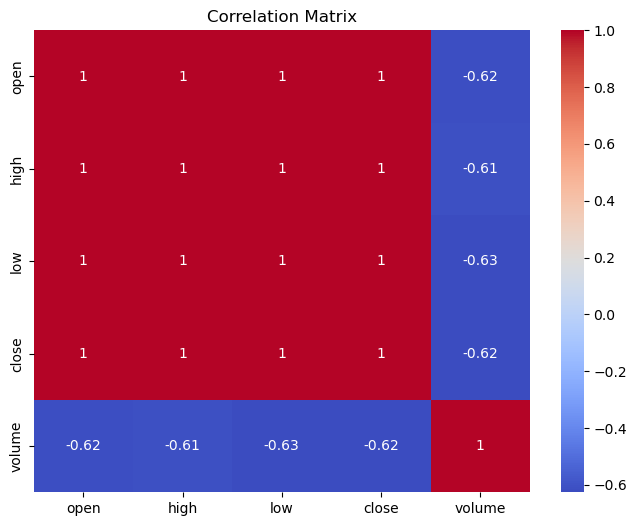

In [6]:
print(df.describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
plt.plot(df['date'], df['close'])
plt.title('Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
sns.histplot(df['volume'], bins=50, kde=True)
plt.title('Volume Distribution')
plt.show()

sns.boxplot(x=df['close'])
plt.title('Close Price Outliers')
plt.show()


plt.figure(figsize=(8, 6))
sns.heatmap(df[['open', 'high', 'low', 'close', 'volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()